In [2]:
train_tweets = pd.read_csv('train_tweets.csv')
test_tweets = pd.read_csv('test_tweets.csv')

In [3]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [4]:
train_tweets = train_tweets[['label','tweet']]
test = test_tweets['tweet']

C:\Users\admin\AppData\Local\Temp\ipykernel_10540\1828697125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig1 = sns.barplot(x='label', y='length', data=train_tweets, palette='PRGn')


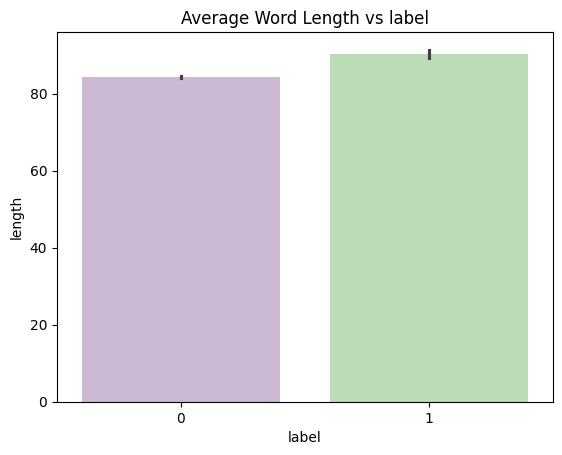

In [5]:
train_tweets['length'] = train_tweets['tweet'].apply(len)

fig1 = sns.barplot(x='label', y='length', data=train_tweets, palette='PRGn')
plt.title('Average Word Length vs label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

In [6]:
train_tweets['tweet'][:1]

0     @user when a father is dysfunctional and is s...
Name: tweet, dtype: object

In [7]:
import pandas as pd
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != '@user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [8]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
train_tweets

,label,tweet,length,tweet_list
0,0,@user when a father is dysfunctional and is s...,102,"[user, father, dysfunctional, selfish, drag, k..."
1,0,@user @user thanks for #lyft credit i can't us...,122,"[user, user, thank, lyft, credit, ca, use, cau..."
2,0,bihday your majesty,21,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time]"
4,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,"[eat, user, isz, youuu]"
31958,0,to see nina turner on the airwaves trying to...,131,"[see, nina, turner, airwaves, try, wrap, mantl..."
31959,0,listening to sad songs on a monday morning otw...,63,"[listen, sad, songs, monday, morning, otw, wor..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,"[user, sikh, temple, vandalise, calgary, wso, ..."


In [11]:
train_tweets[train_tweets['label']==1].drop('tweet',axis=1).head()

,label,length,tweet_list
13,1,74,"[user, cnn, call, michigan, middle, school, wa..."
14,1,101,"[comment, australia, opkillingbay, seashepherd..."
17,1,22,"[retweet, agree]"
23,1,47,"[user, user, lumpy, say, prove, lumpy]"
34,1,104,"[unbelievable, century, need, something, like,..."


In [12]:
train_tweets[:14]

,label,tweet,length,tweet_list
0,0,@user when a father is dysfunctional and is s...,102,"[user, father, dysfunctional, selfish, drag, k..."
1,0,@user @user thanks for #lyft credit i can't us...,122,"[user, user, thank, lyft, credit, ca, use, cau..."
2,0,bihday your majesty,21,"[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time]"
4,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"
5,0,[2/2] huge fan fare and big talking before the...,116,"[huge, fan, fare, big, talk, leave, chaos, pay..."
6,0,@user camping tomorrow @user @user @user @use...,74,"[user, camp, tomorrow, user, user, user, user,..."
7,0,the next school year is the year for exams.ð...,143,"[next, school, year, year, ca, think, school, ..."
8,0,we won!!! love the land!!! #allin #cavs #champ...,87,"[love, land, allin, cavs, champion, cleveland,..."
9,0,@user @user welcome here ! i'm it's so #gr...,50,"[user, user, welcome]"


In [13]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [14]:
from sklearn.model_selection import train_test_split

# Replace NaN values with the most frequent value (mode)
mode = train_tweets['label'].mode()[0]
train_tweets['label'] = train_tweets['label'].fillna(mode)

msg_train, msg_test, label_train, label_test = train_test_split(
    train_tweets['tweet'],
    train_tweets['label'],
    test_size=0.2,
    random_state=2022,
    stratify=train_tweets['label']
)

In [15]:
#Machine Learning Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x000002322DB78180>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [16]:
# # from sklearn.ensemble import multinomialNB
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import classification_report
# # 

# # 1. create a pipeline object
# clf = Pipeline([
#     ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
#     ('vectorizer_tfidf',TfidfVectorizer()),
#     ('Random Forest',MultinomialNB())
# ])

# # 2. fit with X_train and y_train
# clf.fit(msg_train,label_train)

# # 3. get the predictions for X_test and store it in y_pred
# y_pred = clf.predict(msg_test)

# print(classification_report(label_test,y_pred))


In [17]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      6158
           1       0.47      0.89      0.61       235

    accuracy                           0.96      6393
   macro avg       0.73      0.93      0.80      6393
weighted avg       0.98      0.96      0.96      6393



In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, predictions)
cm

array([[5919,   26],
       [ 239,  209]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

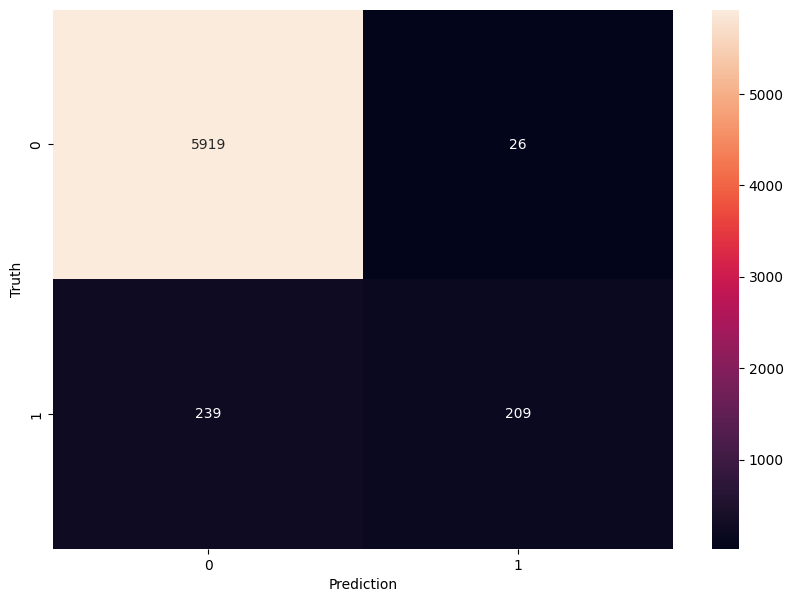

In [19]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [20]:
predictions = pipeline.predict(test_tweets['tweet'])

In [33]:
predictions[:31961]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
label_test[:31961]

17287    0
741      0
19822    0
6380     0
16903    0
        ..
17124    0
29415    0
12996    0
11278    0
27831    0
Name: label, Length: 6393, dtype: int64